# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# **Part 1) Load the data and make a datetime index.**


## Load Data

In [2]:
url="https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/pub?output=csv"
df = pd.read_csv(url)

In [3]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


### 1. Convert the date column to datetime dtype.

In [5]:
#convert the date column values into 'datetime' dtype.
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

Note: At first, I did not add ", format='%Y%m%d'" in the above code when converting to datetime dtype, and it converted every line to 1970-01-01 (which I did not notice at the beginning). I only realized that something is wrong when I tried to make the filter for year 2000 onwards and the filter acted like there are no data for 2000 onwards, then I remembered the [example from Learn Platform](https://login.codingdojo.com/m/565/12978/97193) and fixed my code.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [7]:
df.head(2)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


### 2. Set the date column as the index.

In [8]:
# set 'datetime' as the index
df = df.set_index('date')

In [9]:
df.head(2)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


### 3. Filter out only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
   - precipitation
   - mean_temp
   - min_temp
   - max_temp
   - snow_depth

In [10]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [11]:
# Keep only data from the year 2000 or later.
# Create a filter to do this
filter1 = df.index >= "2000"

In [12]:
# Apply filter1
df = df.loc[filter1]

In [13]:
# Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df[['precipitation','mean_temp','min_temp','max_temp', 'snow_depth']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [15]:
df.head(2)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0


### 4. Impute any missing values.
Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [16]:
def plot_dates(ts,figsize=(12,4),xtick_fontsize='small', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

**`precipitation`**

In [17]:
ts = df['precipitation'].copy()
ts

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2020-12-27    2.0
2020-12-28    0.2
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: precipitation, Length: 7671, dtype: float64

Note: Since the time series is already in daily format, I can use ts.asfreq("D") to set the frequency.


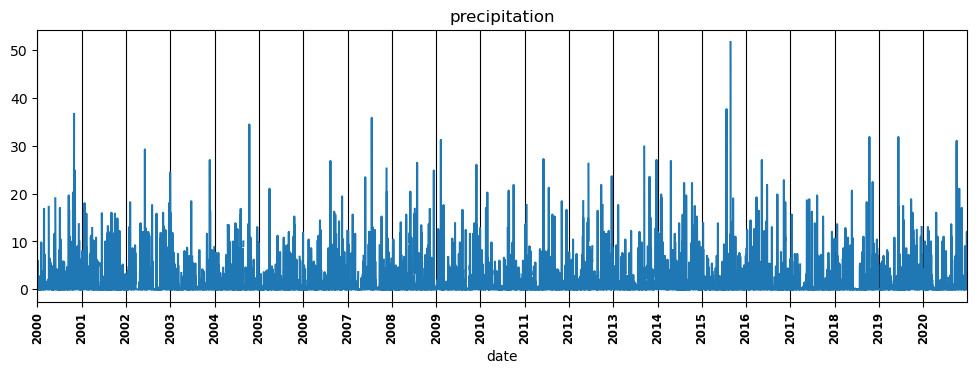

In [18]:
plot_dates(ts);

In [19]:
ts_D = ts.asfreq("D")
ts_D.head()

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
Freq: D, Name: precipitation, dtype: float64

In [20]:
ts_D.isna().sum()

390

In [21]:
##  saving 1 week of values to use for demonstration
example = ts_D.loc['2020-01-01':'2020-01-08']
example


date
2020-01-01    0.0
2020-01-02    1.0
2020-01-03    NaN
2020-01-04    0.0
2020-01-05    0.0
2020-01-06    0.8
2020-01-07    0.2
2020-01-08    1.0
Freq: D, Name: precipitation, dtype: float64

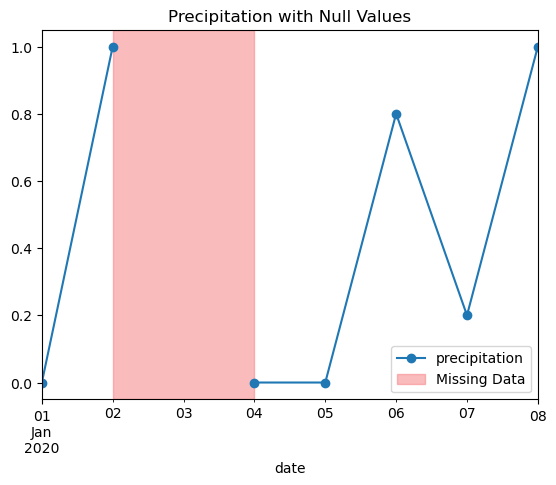

In [22]:
##  Plotting the missing data
ax = example.plot(style='o-', title='Precipitation with Null Values',)
##  Annotating region with null values to impute
ax.axvspan('01-02-2020','01-04-2020', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();

date
2020-01-01    0.0
2020-01-02    1.0
2020-01-03    0.5
2020-01-04    0.0
2020-01-05    0.0
2020-01-06    0.8
2020-01-07    0.2
2020-01-08    1.0
Freq: D, Name: precipitation, dtype: float64


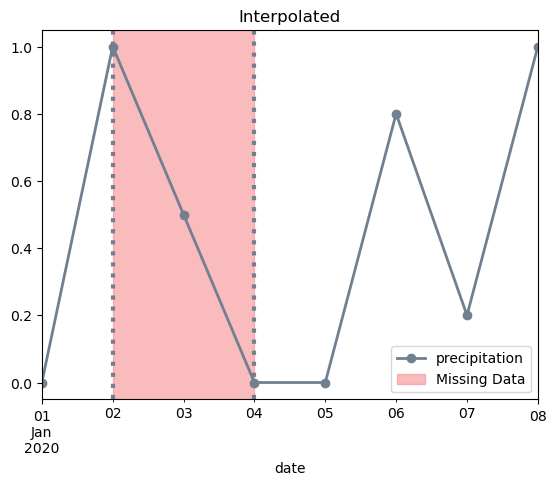

In [23]:
ts_interp = example.interpolate()
print(ts_interp)
ax = ts_interp.plot(style='o-', color='slategray', lw=2,title='Interpolated');
##  annotating start and end values used by interpolate
ax.axvline('01-02-2020', color='slategray',ls=':',lw=3)
ax.axvline('01-04-2020', color='slategray',ls=':',lw=3)
ax.axvspan('01-02-2020','01-04-2020', color='#f7797d', alpha=0.5, zorder=0, label='Missing Data')
ax.legend();